# 1.Download the dataset: Dataset
##Load the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
data=pd.read_csv("Housing.csv")
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


In [20]:
data.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [21]:
data.info


<bound method DataFrame.info of         price      area  bedrooms  bathrooms  stories mainroad guestroom  \
0   -0.200866  1.046726         4          2        3      yes        no   
1   -0.200866  1.757010         4          4        4      yes        no   
2   -0.200866  2.218232         3          2        2      yes        no   
3   -0.200866  1.083624         4          2        2      yes        no   
4   -0.200866  1.046726         4          1        2      yes       yes   
..        ...       ...       ...        ...      ...      ...       ...   
540 -1.681389 -0.991879         2          1        1      yes        no   
541 -1.712438 -1.268613         3          1        1       no        no   
542 -1.722514 -0.705921         2          1        1      yes        no   
543 -1.722514 -1.033389         3          1        1       no        no   
544 -1.722514 -0.599839         3          1        2      yes        no   

    basement hotwaterheating airconditioning  parking f

# 3.Perform Below Visualizations.
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis

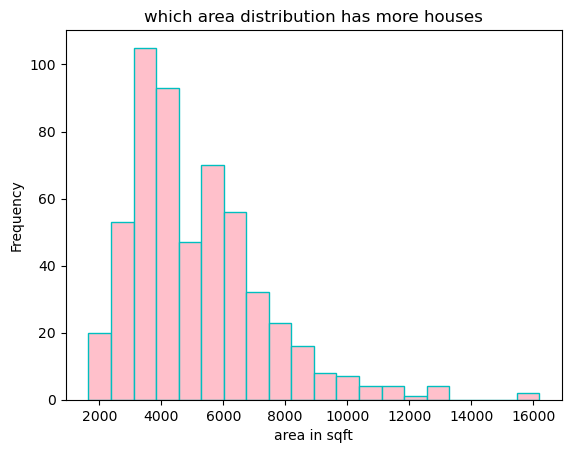

In [5]:

# Select the "Age" variable for univariate analysis
area = data['area']
price=data['price']

# Create a histogram of the Age variable
plt.hist(area.dropna(), bins=20, edgecolor='c',color='pink')
plt.xlabel('area in sqft')
plt.ylabel('Frequency')
plt.title('which area distribution has more houses')
plt.show()




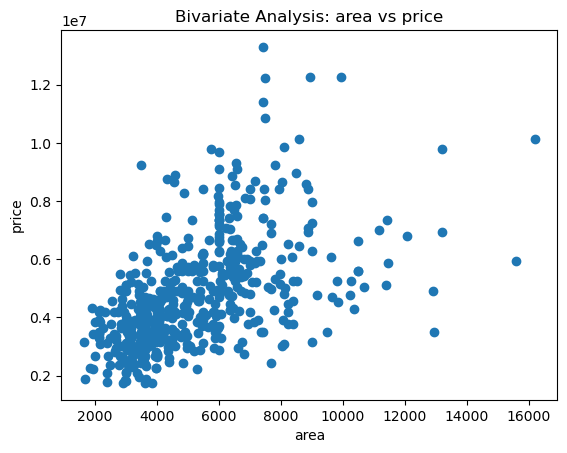

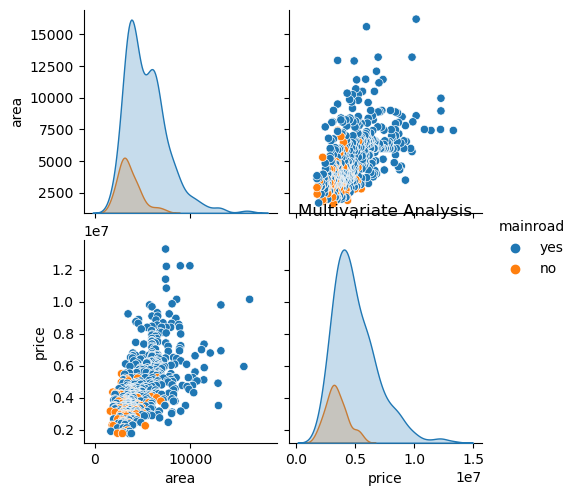

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


In [6]:
#bivarent analysis
# Remove rows with missing values in Age or Fare
data_cleaned= data.dropna(subset=['area', 'price'])

# Create a scatter plot of Age vs Fare
plt.scatter(data_cleaned['area'], data_cleaned['price'])
plt.xlabel('area')
plt.ylabel('price')
plt.title('Bivariate Analysis: area vs price')
plt.show()

#multivarient analysis
variables = ['area', 'price', 'mainroad']

# Filter the dataset for non-null values in the selected variables
data_filtered = data[variables].dropna()

# Create a pairplot to visualize the relationships between variables
sns.pairplot(data_filtered, hue='mainroad')
plt.title('Multivariate Analysis')
plt.show()
# Calculate descriptive statistics
statistics = area.describe()
print(statistics)


# 4.Perform descriptive statistics on the dataset.

In [7]:

# Calculate descriptive statistics
statistics = area.describe()
print(statistics)



count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64


# 5.Handle the Missing values

In [8]:
# Impute missing values in a numerical column with mean
data['price'].fillna(data['price'].mean(), inplace=True)


# Impute missing values in a numerical column with median
data['area'].fillna(data['area'].median(), inplace=True)


# Impute missing values in a categorical column with mode
data['parking'].fillna(data['parking'].mode()[0], inplace=True)
data['guestroom'].fillna(data['guestroom'].mode()[0], inplace=True)

data



,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


# 6.Find the outliers and replace the outliers



In [9]:
# Select the column with potential outliers
column_with_outliers = 'price'

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data[column_with_outliers]))

# Set a threshold for outlier detection 
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)[0]

# Replace outliers with a specified value (e.g., median of the column)
replacement_value = data[column_with_outliers].median()
data.loc[outlier_indices, column_with_outliers] = replacement_value

# Display 
print(data.head())

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4340000  7420         4          2        3      yes        no       no   
1  4340000  8960         4          4        4      yes        no       no   
2  4340000  9960         3          2        2      yes        no      yes   
3  4340000  7500         4          2        2      yes        no      yes   
4  4340000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


# 7.Check for Categorical columns and perform encoding

In [11]:
# Check for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("Categorical columns:")
print(categorical_cols)

# Perform one-hot encoding on categorical columns
encoded_df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display 
print(encoded_df.head())

Categorical columns:
Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')
     price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  4340000  7420         4          2        3        2             1   
1  4340000  8960         4          4        4        3             1   
2  4340000  9960         3          2        2        2             1   
3  4340000  7500         4          2        2        3             1   
4  4340000  7420         4          1        2        2             1   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0              0             0                    0                    1   
1              0             0                    0                    1   
2              0             1                    0                    0   
3              0             1                    0                    1   
4              1            

# 8.Split the data into dependent and independent variables.

In [56]:
# Select the independent variables (features)
indep = data[['mainroad', 'bedrooms', 'stories', 'guestroom','basement']]

# Select the dependent variable (target)
depen = data['price']

# Display the independent variables
print(indep.head())

# Display the dependent variable
print(depen.head())

  mainroad  bedrooms   stories guestroom basement
0      yes  1.403419  1.378217        no       no
1      yes  1.403419  2.532024        no       no
2      yes  0.047278  0.224410        no      yes
3      yes  1.403419  0.224410        no      yes
4      yes  1.403419  0.224410       yes      yes
0   -0.200866
1   -0.200866
2   -0.200866
3   -0.200866
4   -0.200866
Name: price, dtype: float64


# 9.Scale the independent variables

In [58]:
from sklearn.preprocessing import StandardScaler
# Select the independent variables to scale
independent_vars = ['bedrooms', 'stories']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the independent variables
data[independent_vars] = scaler.fit_transform(data[independent_vars])

# Display the scaled independent variables
print(data[independent_vars].head())

   bedrooms   stories
0  1.403419  1.378217
1  1.403419  2.532024
2  0.047278  0.224410
3  1.403419  0.224410
4  1.403419  0.224410


# 10.Split the data into training and testing

In [70]:
from sklearn.model_selection import train_test_split
features = ['area', 'basement']
target = 'price'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (436, 2) (436,)
Testing set shape: (109, 2) (109,)


# 11. model creation linear regression

In [78]:
from sklearn.linear_model import LinearRegression

# Onehot coding

In [94]:
import pandas as pd

# Assuming your housing dataset is stored in a DataFrame called housing_data
# Select the categorical variables to be one-hot encoded
categorical_vars = ['mainroad', 'basement','guestroom','hotwaterheating','airconditioning','furnishingstatus']

# Perform one-hot encoding
housing_data_encoded = pd.get_dummies(data, columns=categorical_vars)


In [101]:



# Separate the independent variables (features) and the dependent variable (target)
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Perform one-hot encoding on categorical variables
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), ['mainroad', 'basement','guestroom','hotwaterheating','airconditioning','furnishingstatus'])],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)



# Linear model

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


LinearRegression()

In [104]:
pred=linear_reg.predict(X_test)
pred

array([ 0.1088584 ,  0.99947058, -0.76920076,  0.09141172, -0.71200262,
       -0.5096866 ,  0.48303577,  0.63515207, -1.11349048, -1.20664568,
        2.16677087, -0.97541589, -0.91001633, -0.66457344, -0.41727606,
        0.05997717, -0.81386506,  0.10841283, -0.08196459, -0.48534204,
        0.40500562,  0.55639786, -1.01669126, -0.16729944,  0.33177826,
        1.20067192, -0.64618952,  0.28470418,  1.65150257, -0.66249938,
        0.6199868 , -0.71724045,  1.13861583, -0.08324924, -0.47834804,
        0.53001994,  0.20912566, -0.06088935, -0.88253014, -0.13535874,
       -0.01026476, -0.61088821,  0.98788451, -0.3634251 , -0.37672263,
       -0.22126703,  1.17129832, -0.24399713, -0.37931258, -0.7447044 ,
        1.32013054, -1.04764444, -0.15942161, -0.05326246, -0.4028242 ,
       -1.17623225,  1.21882528, -0.8845539 , -0.04490111, -0.99482256,
       -0.09427241, -0.80159546,  0.17605256, -0.17836858, -0.32979166,
        0.06174395,  1.03383571, -0.55775716,  0.7373232 ,  0.52

In [106]:
pred1=linear_reg.predict(X_train)
pred1

array([ 1.24087695,  1.02176558, -0.02056834, -0.61423925, -0.68903896,
       -0.07579356, -0.67455638, -1.05994279, -1.33453265, -0.42020112,
       -0.22928349, -0.43000164, -0.0826155 , -0.28434282, -0.25394463,
        0.768563  , -1.25663325,  0.18895955, -0.71989163,  1.33803403,
        0.83999839, -0.60679478,  0.37115738,  0.97049316,  0.90835578,
       -0.70352155, -1.33088128, -0.71274939,  0.28003387, -0.84964181,
       -0.53148533, -1.16065823, -0.33862988,  0.46449033, -0.60766519,
       -0.30903247, -1.28815765,  0.79360303,  0.11643585,  0.98072005,
        1.36900171,  0.2091376 ,  0.08248563, -0.62417389, -0.37328783,
       -0.786402  ,  1.47015616,  1.39426457, -0.64198217,  1.17602879,
       -0.46099083, -0.52050822,  0.89263245,  0.38823812,  0.04691943,
       -0.07998436, -0.40284793, -0.19981015,  1.00870209,  0.47369069,
        0.74771029, -0.80070976, -0.17595514,  1.94915717,  0.18066066,
        1.20786725,  1.66598046, -0.69358473,  1.29927754,  0.34

# 14.performance metrics

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the testing data
y_pred = linear_reg.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.5051337697615725
Root Mean Squared Error: 0.7107276340213405
Mean Absolute Error: 0.55177295414068
R-squared: 0.6273081687625074
